# Tratando dados

In [89]:
import pandas as pd 
import seaborn as sns
import numpy as np

In [90]:
dados = pd.read_csv('desmatamento_acre.csv')
dados.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01


In [91]:
print('A tabela possui {} dados nulos'.format(dados.isna().sum().sum()))

A tabela possui 0 dados nulos


In [92]:
dados.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [93]:
index = {'year': 'ano', 'state': 'estado', 'month': 'mes', 'number': 'numero_de_queimadas', 'date': 'dia'}

In [94]:
dados = dados.rename(columns= index)
dados.head(1)

,ano,estado,mes,numero_de_queimadas,dia
0,1998,Acre,Janeiro,0,1998-01-01


In [95]:
dados.dia = pd.to_datetime(dados.dia)
dados.dtypes

ano                             int64
estado                         object
mes                            object
numero_de_queimadas             int64
dia                    datetime64[ns]
dtype: object

# Analisando os dados

In [96]:
print('O numero médio de queimadas é de {} incêndios por mês no estado do Acre'.format(dados.numero_de_queimadas.mean()))

O numero médio de queimadas é de 77.2510460251046 incêndios por mês no estado do Acre


In [97]:
# Média de queimadas por mês
numero_de_queimadas = dados.groupby('mes', sort= False).agg({'numero_de_queimadas': ['mean', 'median']}).round(0).T
numero_de_queimadas

mes                         Janeiro  Fevereiro  Março  Abril  Maio  Junho  \
numero_de_queimadas mean        2.0        1.0    1.0    2.0   4.0   13.0   
                    median      0.0        0.0    0.0    1.0   2.0    4.0   

mes                         Julho  Agosto  Setembro  Outubro  Novembro  \
numero_de_queimadas mean    115.0   320.0      66.0    362.0      35.0   
                    median   48.0   165.0       2.0    332.0      16.0   

mes                         Dezembro  
numero_de_queimadas mean         2.0  
                    median       1.0

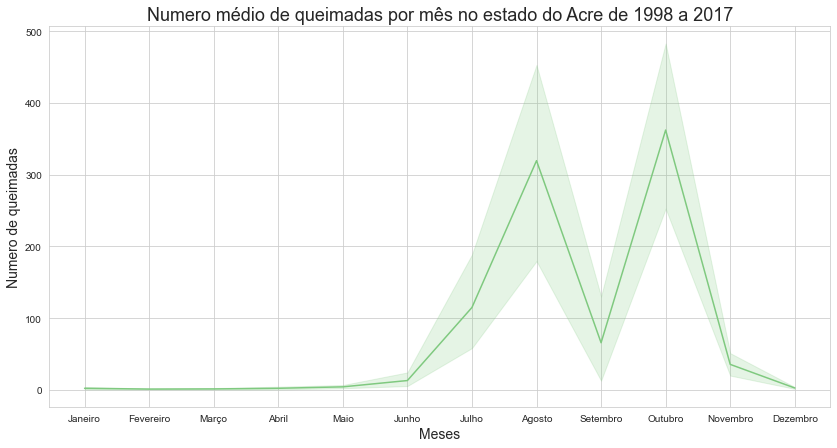

In [98]:
sns.set_style('whitegrid')
ax = sns.lineplot(x= 'mes', y = 'numero_de_queimadas', data = dados)
ax.figure.set_size_inches(14, 7)
ax.set_title('Numero médio de queimadas por mês no estado do Acre de 1998 a 2017', fontsize = 18)
ax.set_ylabel('Numero de queimadas', fontsize = 14)
ax.set_xlabel('Meses', fontsize = 14)
ax = ax

In [99]:
#Média de Queimadas por ano
numero_de_queimadas_ano = dados.groupby('ano', sort= False).agg({'numero_de_queimadas': ['mean', 'median']}).round(0).T
numero_de_queimadas_ano

ano                         1998  1999  2000  2001   2002  2003  2004  2005  \
numero_de_queimadas mean    61.0  28.0  36.0  69.0  129.0  79.0  99.0  82.0   
                    median   2.0   0.0   1.0   0.0    1.0   3.0   6.0   4.0   

ano                          2006   2007  2008  2009  2010  2011  2012  2013  \
numero_de_queimadas mean    102.0  101.0  95.0  69.0  40.0  59.0  99.0  92.0   
                    median    3.0    3.0   0.0   2.0   2.0   4.0   2.0   6.0   

ano                         2014  2015   2016  2017  
numero_de_queimadas mean    46.0  99.0  102.0  56.0  
                    median   4.0   3.0    9.0   2.0

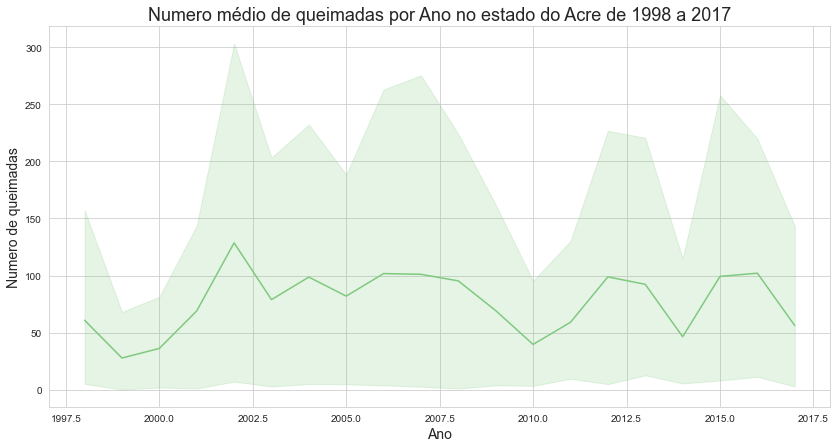

In [100]:
sns.set_palette('Accent')
ax = sns.lineplot(x= 'ano', y = 'numero_de_queimadas', data = dados)
ax.figure.set_size_inches(14, 7)
ax.set_title('Numero médio de queimadas por Ano no estado do Acre de 1998 a 2017', fontsize = 18)
ax.set_ylabel('Numero de queimadas', fontsize = 14)
ax.set_xlabel('Ano', fontsize = 14)
ax = ax